In [2]:
import os, pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
from sklearn_extra.cluster import KMedoids
from collections import Counter
import yellowbrick

In [3]:
data = pd.read_csv('D:/STDV 1/ANALYSEDEDONNEES/PROJET CLUSTERING/states.csv')

#### Data exploration, vizualisation and preparation

In [5]:
data.head(n=10)

,State,Pop_Total,Immigration_dom_net,Am_migration_avec_etranger,Immigration_inter_net,Taux_naissance,Taux_mortalite,Pop_moins_65,Pop_plus_65
State,,,,,,,,,
Alabama,Alabama,4464356,-1.784356,-0.021952,0.689685,14.407229,10.284126,869.212939,130.787061
Alaska,Alaska,634892,-1.718402,-0.239411,2.094844,15.952319,4.644884,941.949182,58.050818
Arizona,Arizona,5307331,14.250666,-0.033915,4.294814,15.882748,7.766050,869.535365,130.464635
Arkansas,Arkansas,2692090,0.358086,-0.013373,1.069429,14.349075,10.507078,861.061480,138.938520
California,California,34501130,-2.014398,-0.043912,7.879191,15.371931,6.715519,894.028746,105.971254
Colorado,Colorado,4417714,9.317941,-0.057269,3.574473,14.568168,6.263420,903.517521,96.482479
Connecticut,Connecticut,3425074,-2.365496,-0.017518,3.495983,12.524693,8.998346,862.638880,137.361120
Delaware,Delaware,796165,5.393354,-0.040193,2.123932,14.014683,8.793403,869.446660,130.553340
District of Columbia,District of Columbia,571822,-7.771649,-0.073449,5.727307,14.327885,10.763839,880.753101,119.246899


In [4]:
data.columns =['State','Pop_Total','Immigration_dom_net','Am_migration_avec_etranger',
               'Immigration_inter_net','Taux_naissance','Taux_mortalite','Pop_moins_65','Pop_plus_65'] #changer le nom des colonnes

In [5]:
data.index=data['State'] #Changer le nom des lignes

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51 entries, Alabama to Wyoming
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   State                       51 non-null     object 
 1   Pop_Total                   51 non-null     int64  
 2   Immigration_dom_net         51 non-null     float64
 3   Am_migration_avec_etranger  51 non-null     float64
 4   Immigration_inter_net       51 non-null     float64
 5   Taux_naissance              51 non-null     float64
 6   Taux_mortalite              51 non-null     float64
 7   Pop_moins_65                51 non-null     float64
 8   Pop_plus_65                 51 non-null     float64
dtypes: float64(7), int64(1), object(1)
memory usage: 3.6+ KB


In [34]:
data.describe()

,Pop_Total,Immigration_dom_net,Am_migration_avec_etranger,Immigration_inter_net,Taux_naissance,Taux_mortalite,Pop_moins_65,Pop_plus_65
count,5.100000e+01,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,5.584253e+06,0.245705,-0.043689,2.529699,13.864436,8.732639,874.882913,125.117087
std,6.263147e+06,6.910674,0.055606,1.890858,1.735674,1.389106,18.494279,18.494279
min,4.944230e+05,-13.482586,-0.293205,0.272488,10.313445,4.644884,826.277840,58.050818
25%,1.517120e+06,-3.537676,-0.054932,1.071969,12.772303,7.800254,865.756168,118.139942
50%,4.063011e+06,-1.733683,-0.031338,2.093872,13.938746,8.903040,872.745487,127.254513
75%,6.247024e+06,3.663932,-0.009213,3.535228,14.681799,9.725720,881.860058,134.243832
max,3.450113e+07,27.349466,-0.000555,7.879191,20.405862,11.895671,941.949182,173.722160


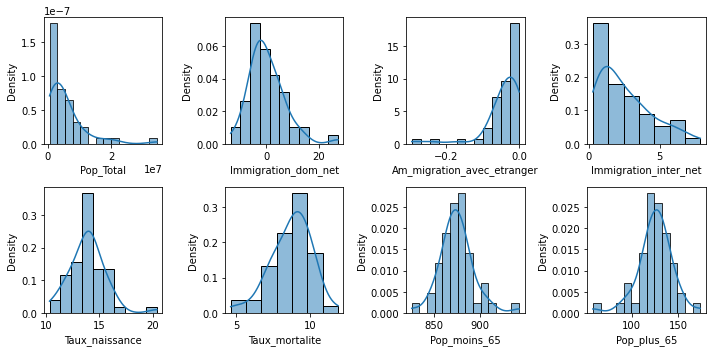

In [33]:
fig, axes = plt.subplots(2,4,figsize=(10,5)) 
columns = ['Pop_Total','Immigration_dom_net','Am_migration_avec_etranger',
               'Immigration_inter_net','Taux_naissance','Taux_mortalite','Pop_moins_65','Pop_plus_65']
for i,col in enumerate(list(columns)):
    plot = sns.histplot(data=data[col], kde=True, stat='density', ax=axes.flatten()[i])
plt.tight_layout() 
plt.show()

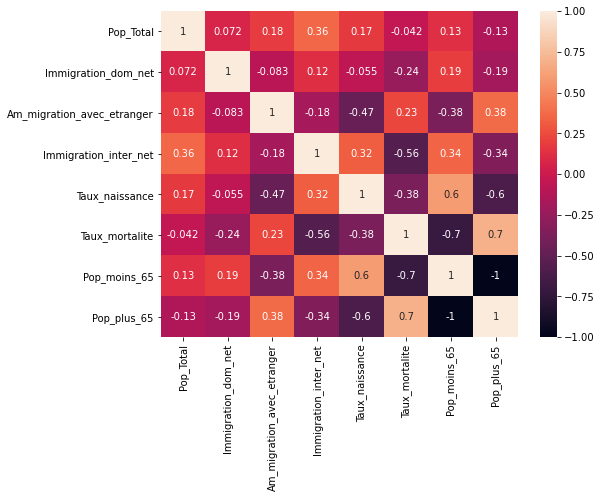

In [35]:
corr_data = data.corr(method='spearman')
plt.figure(figsize=(8, 6))
sns.heatmap(corr_data, annot=True)
plt.show()

In [60]:
data.head()

,State,Pop_Total,Immigration_dom_net,Am_migration_avec_etranger,Immigration_inter_net,Taux_naissance,Taux_mortalite,Pop_moins_65,Pop_plus_65
State,,,,,,,,,
Alabama,Alabama,4464356,-1.784356,-0.021952,0.689685,14.407229,10.284126,869.212939,130.787061
Alaska,Alaska,634892,-1.718402,-0.239411,2.094844,15.952319,4.644884,941.949182,58.050818
Arizona,Arizona,5307331,14.250666,-0.033915,4.294814,15.882748,7.766050,869.535365,130.464635
Arkansas,Arkansas,2692090,0.358086,-0.013373,1.069429,14.349075,10.507078,861.061480,138.938520
California,California,34501130,-2.014398,-0.043912,7.879191,15.371931,6.715519,894.028746,105.971254


In [32]:
data1=data.drop(['State','Pop_Total'],axis=1)

In [33]:
datascale=pd.DataFrame(scale(data1))
datascale.columns =['Immigration_dom_net','Am_migration_avec_etranger',
               'Immigration_inter_net','Taux_naissance','Taux_mortalite','Pop_moins_65','Pop_plus_65']


In [34]:
datascale.head()

,Immigration_dom_net,Am_migration_avec_etranger,Immigration_inter_net,Taux_naissance,Taux_mortalite,Pop_moins_65,Pop_plus_65
0,-0.296680,0.394811,-0.982794,0.315839,1.128010,-0.309631,0.309631
1,-0.287042,-3.554784,-0.232266,1.214893,-2.972006,3.662409,-3.662409
2,2.046735,0.177521,0.942788,1.174411,-0.702759,-0.292023,0.292023
3,0.016424,0.550629,-0.779964,0.282000,1.290107,-0.754772,0.754772
4,-0.330300,-0.004036,2.857286,0.877178,-1.466549,1.045531,-1.045531


In [35]:
datascale.index=data['State']

#### Clustering using k-means

Ressource:
https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

C:\Users\JOJR\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


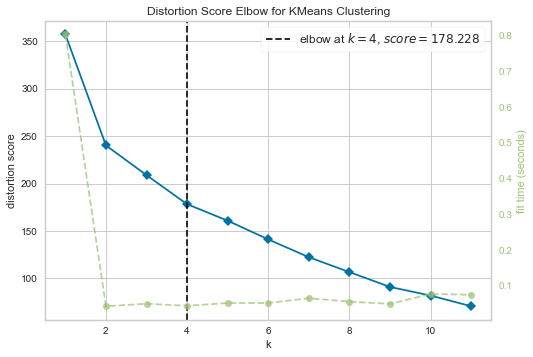

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [9]:
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer
model_kmeans = KMeans(max_iter=1000)
datascale_kmean = KElbowVisualizer(model_kmeans, k=(1,12)).fit(datascale)
datascale_kmean.show()

In [10]:
datascale_kmean = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(datascale)

In [11]:
datascale_kmean.labels_
Counter(datascale_kmean.labels_)

Counter({1: 36, 0: 15})

In [73]:
datascale_kmean_label=pd.DataFrame(data['State'])
datascale_kmean_label['label']=datascale_kmean.labels_
datascale_kmean_label[datascale_kmean_label['label']==1]
datascale_kmean_label[datascale_kmean_label['label']==0]

,State,label
State,,
Alaska,Alaska,0
Arizona,Arizona,0
California,California,0
Colorado,Colorado,0
Georgia,Georgia,0
Hawaii,Hawaii,0
Idaho,Idaho,0
Maryland,Maryland,0
Nevada,Nevada,0


#### Clustering using k-medoid

Ressources:
k-medoids using python:
https://scikit-learn-extra.readthedocs.io/en/stable/generated/sklearn_extra.cluster.KMedoids.html

Silhouette and Elbow method for number of cluster optimal:
https://www.scikit-yb.org/en/latest/api/cluster/elbow.html

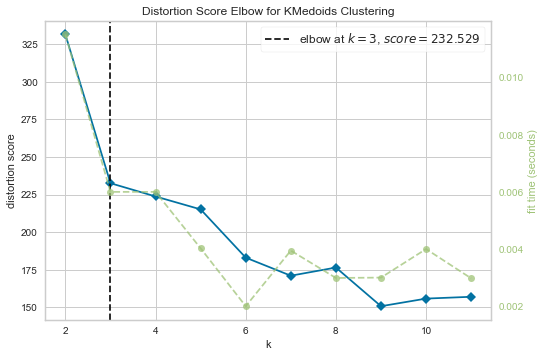

<AxesSubplot:title={'center':'Distortion Score Elbow for KMedoids Clustering'}, xlabel='k', ylabel='distortion score'>

In [34]:
model_kmedo = KMedoids()
datascale_kmedo = KElbowVisualizer(model_kmedo, k=(2,12)).fit(datascale)
datascale_kmedo.show()

In [37]:
model_kmedo = KMedoids(method='pam',n_clusters=2)
datascale_kmedo = model_kmedo.fit(datascale)
datascale_kmedo.labels_
Counter(datascale_kmedo.labels_)

Counter({0: 30, 1: 21})

#### Clustering using Hierarchical Ascending Classification (CAH)

Ressource: Hierarchical Ascending Classification using python

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html#sklearn.cluster.AgglomerativeClustering.fit_predict

In [14]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering as ac

In [36]:
datascale['State']=datascale.index

In [37]:
datascale.head()

,Immigration_dom_net,Am_migration_avec_etranger,Immigration_inter_net,Taux_naissance,Taux_mortalite,Pop_moins_65,Pop_plus_65,State
State,,,,,,,,
Alabama,-0.296680,0.394811,-0.982794,0.315839,1.128010,-0.309631,0.309631,Alabama
Alaska,-0.287042,-3.554784,-0.232266,1.214893,-2.972006,3.662409,-3.662409,Alaska
Arizona,2.046735,0.177521,0.942788,1.174411,-0.702759,-0.292023,0.292023,Arizona
Arkansas,0.016424,0.550629,-0.779964,0.282000,1.290107,-0.754772,0.754772,Arkansas
California,-0.330300,-0.004036,2.857286,0.877178,-1.466549,1.045531,-1.045531,California


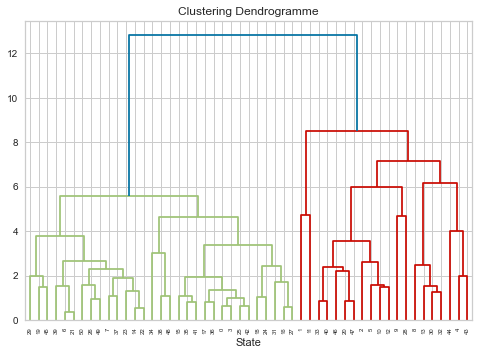

In [38]:
dendrogram = sch.dendrogram(sch.linkage(datascale.iloc[:,0:6], method  = "ward"))
plt.title('Clustering Dendrogramme')
plt.xlabel('State')
plt.show()

In [41]:
model_cah=AgglomerativeClustering(n_clusters=2, affinity='euclidean',compute_full_tree='auto', linkage='ward', 
                                     compute_distances=False)

In [45]:
datascale_ag=model_cah.fit(datascale.iloc[:,0:6])

In [47]:
datascale_ag.labels_
Counter(datascale_ag.labels_)

Counter({1: 31, 0: 20})